In [10]:
import numpy as np
import pandas as pd
import scanpy as sc

In [12]:
adata = sc.read('../data/rnaseq_mouse_e55/Cheng_E55.h5ad')
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 269 × 18041
    obs: 'embryonic_day', 'cell_type', 'atp', 'batch'
    var: 'gene_symbol'

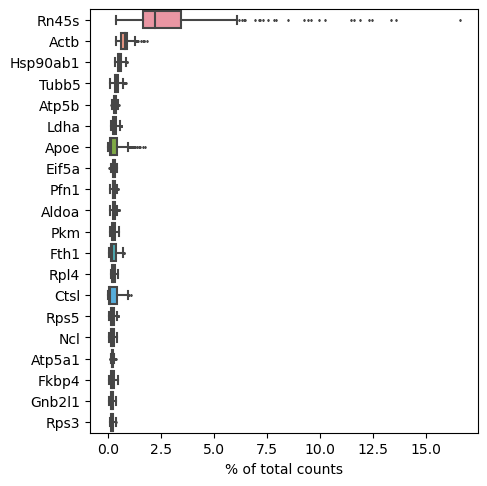

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [14]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

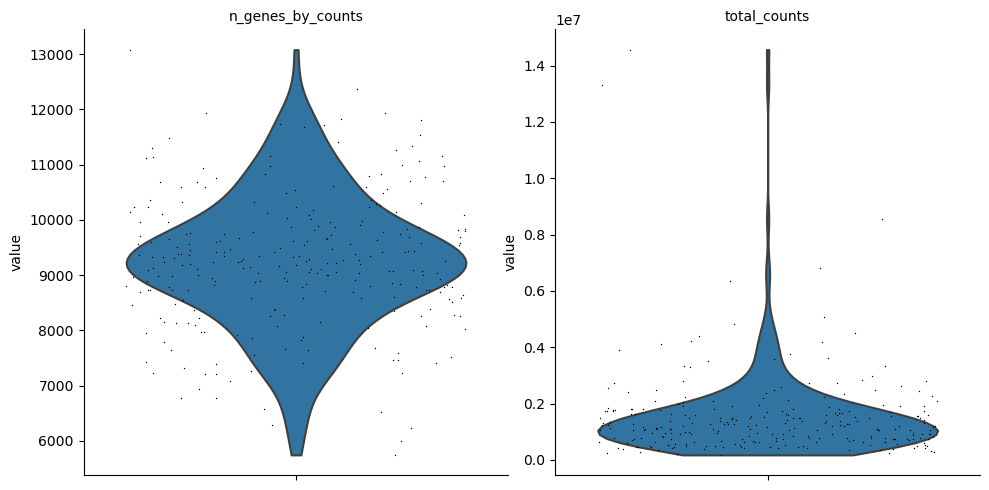

In [15]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

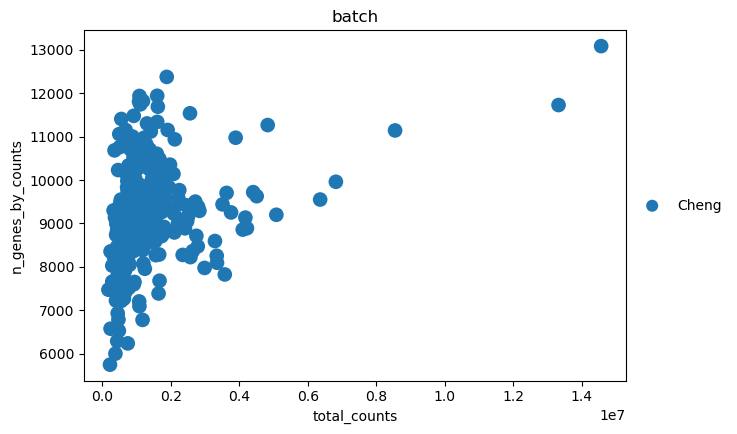

In [16]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='batch')

In [17]:
adata.obs.n_genes_by_counts

EB_1006    9388
EB_1007    8803
EB_1010    9424
EB_1009    9289
EB_1011    9037
           ... 
EB_994     7405
EB_997     7216
EB_988     8471
EB_996     8254
EB_995     9702
Name: n_genes_by_counts, Length: 269, dtype: int64

In [18]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [19]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

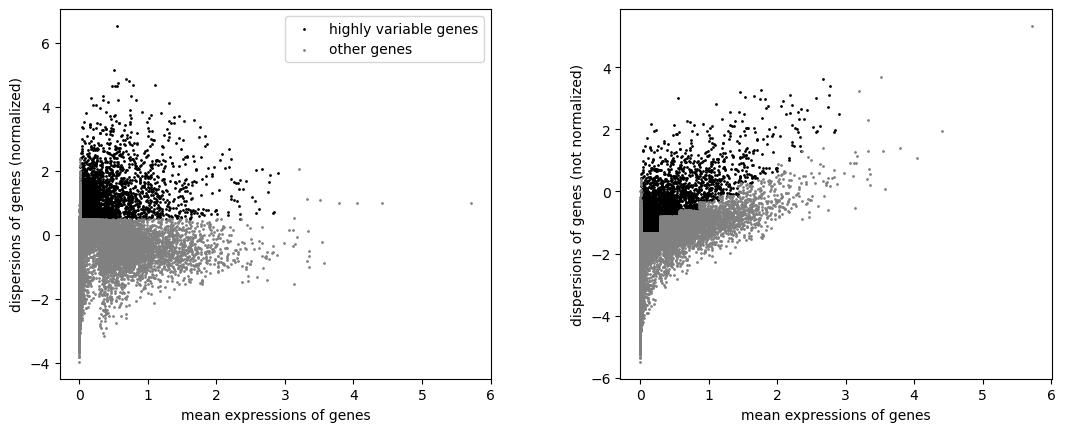

In [20]:
sc.pl.highly_variable_genes(adata)

In [21]:
adata = adata[:, adata.var.highly_variable]

In [22]:
sc.pp.scale(adata, max_value=10)

/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [23]:
sc.tl.pca(adata, svd_solver='arpack')

/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


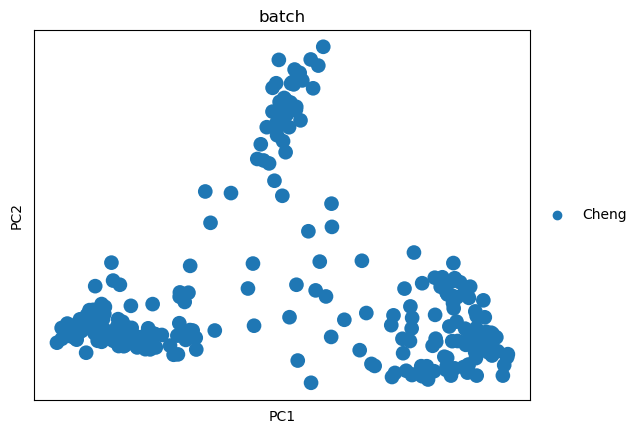

In [24]:
sc.pl.pca(adata, color='batch')

In [25]:
sc.pp.neighbors(adata)

/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/networkx/convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


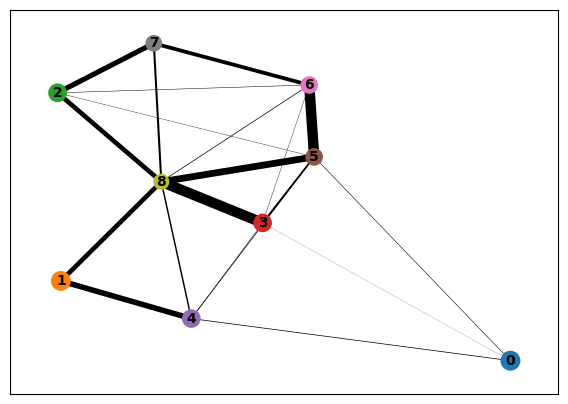

In [26]:
sc.tl.leiden(adata)
sc.tl.paga(adata)
sc.pl.paga(adata)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

In [27]:
adata.var_names

Index(['Adora1', 'Obsl1', 'Pgap1', 'Bmpr2', 'Sh3bp4', 'Cdk18', 'Rab3gap1',
       'Mapkapk2', 'Rnpep', 'Aspm',
       ...
       'Xpnpep1', 'Dusp5', 'Pdcd4', 'Gpam', 'Habp2', 'Tdrd1', 'Afap1l2',
       'Ccdc172', 'Slc18a2', 'Csf2ra'],
      dtype='object', length=4405)

/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


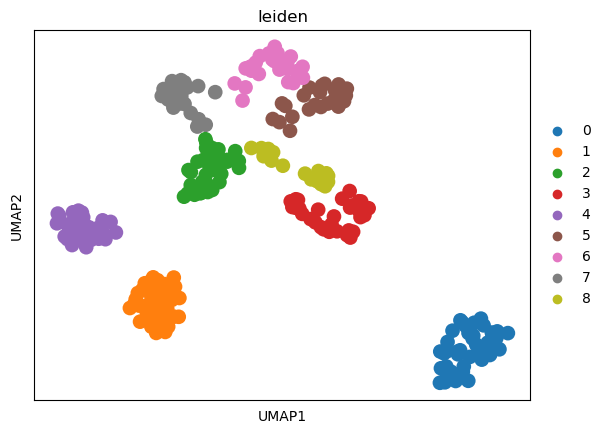

In [28]:
sc.pl.umap(adata, color=['leiden'])

/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  c

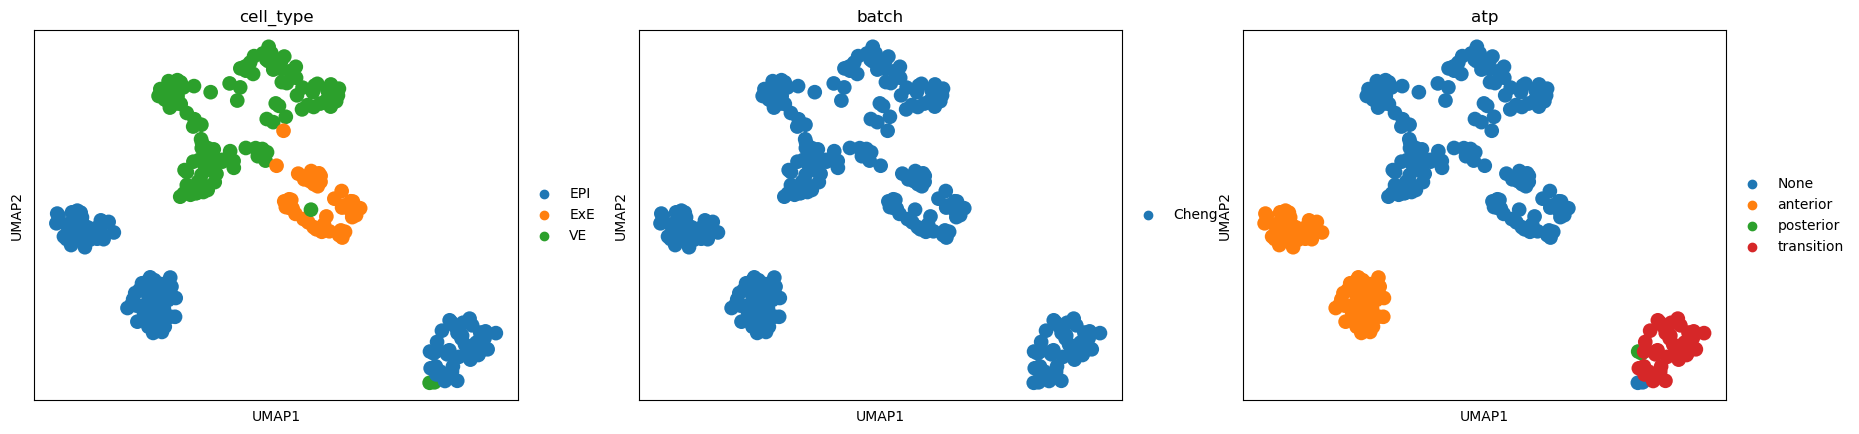

In [29]:
sc.pl.umap(adata, color=['cell_type', 'batch', 'atp'])

/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py

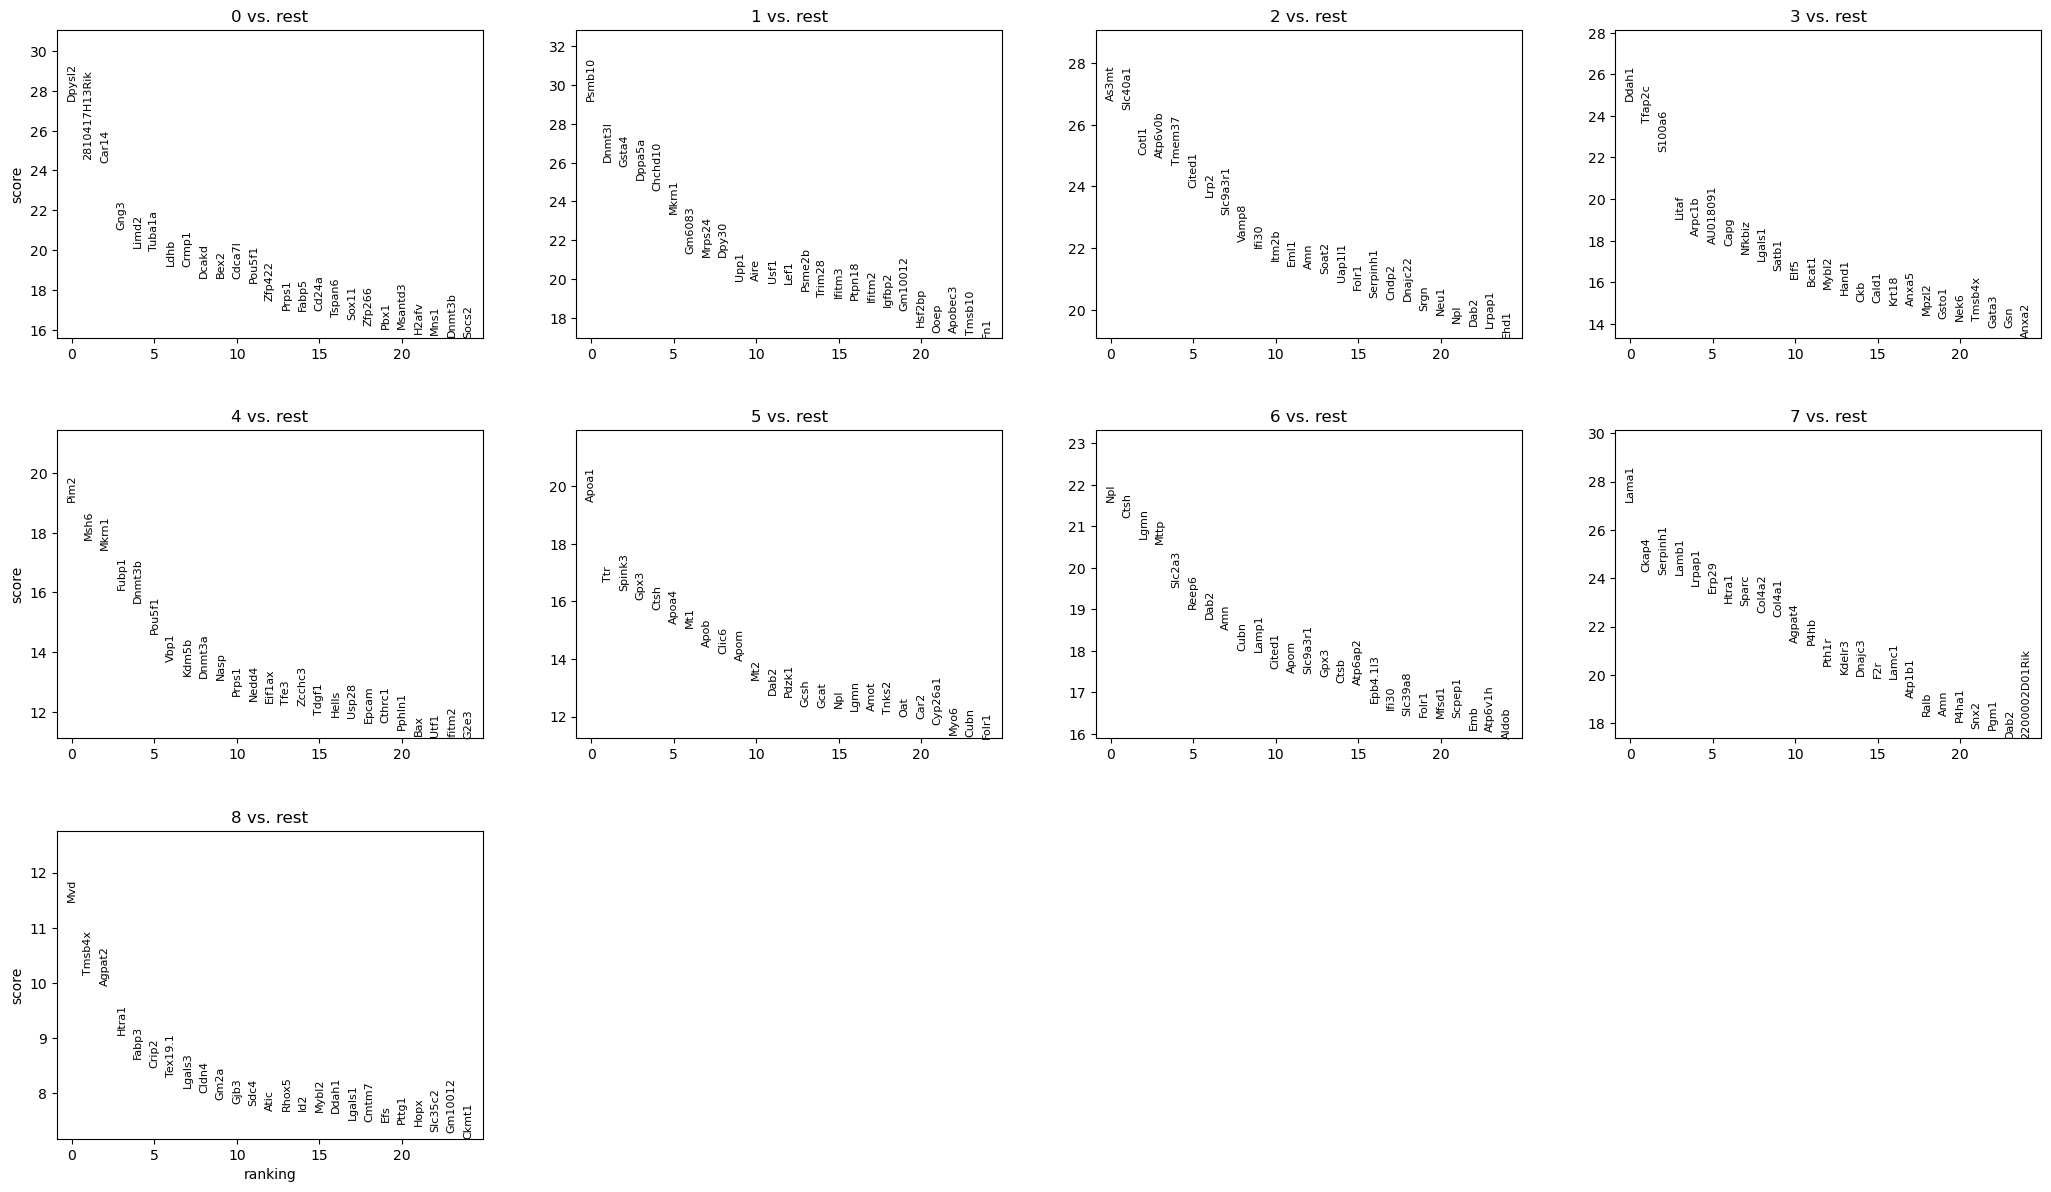

In [30]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

C:\Users\schmi\miniconda3\envs\comp-methods-env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


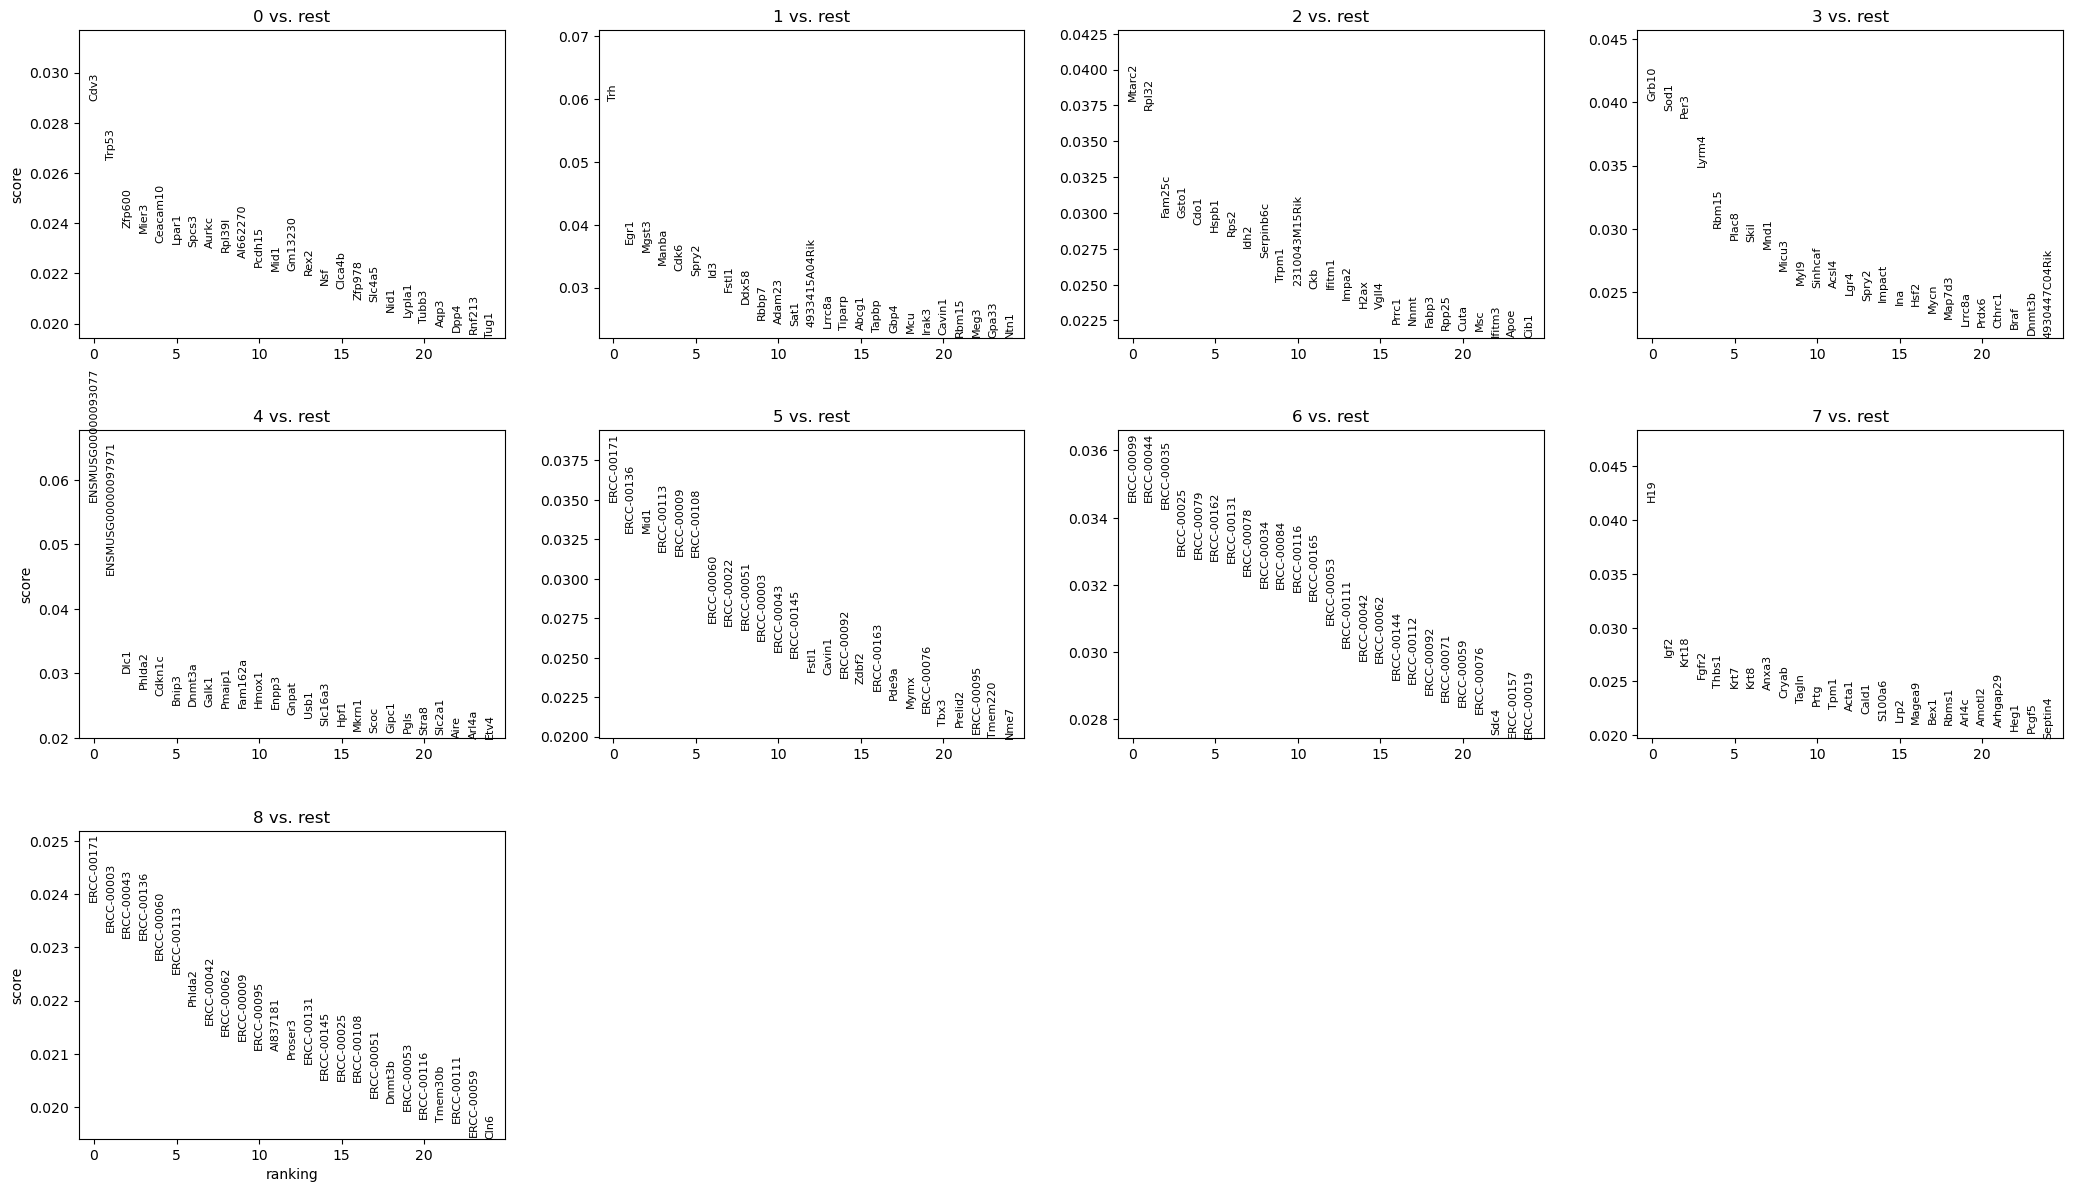

In [104]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

C:\Users\schmi\miniconda3\envs\comp-methods-env\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\schmi\miniconda3\envs\comp-methods-env\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\schmi\miniconda3\envs\comp-methods-env\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\schmi\miniconda3\envs\comp-methods-env\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\schmi\miniconda3\envs\comp-methods-env\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  se

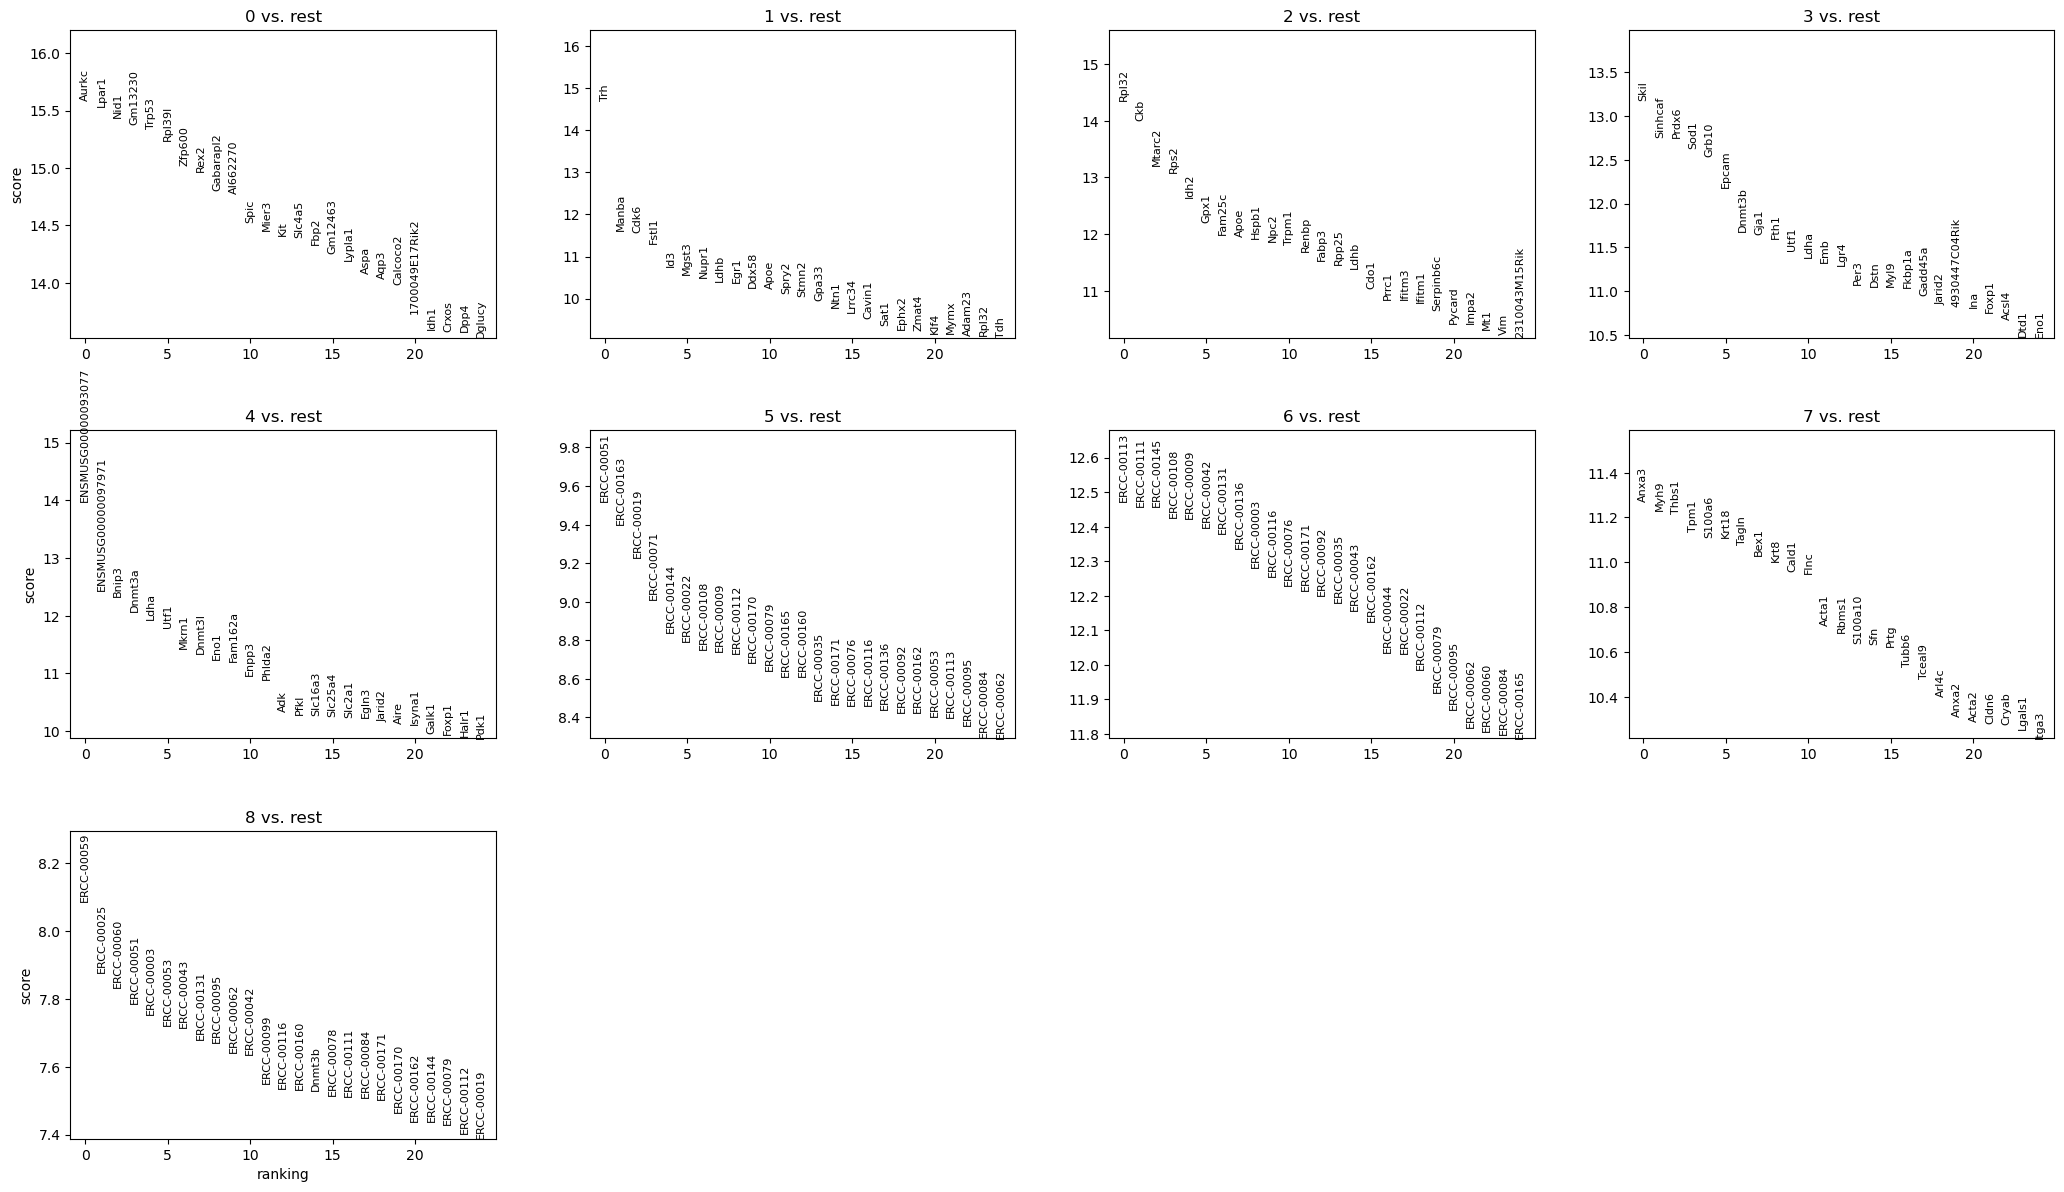

In [114]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [33]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7,8
0,Dpysl2,Psmb10,As3mt,Ddah1,Pim2,Apoa1,Npl,Lama1,Mvd
1,2810417H13Rik,Dnmt3l,Slc40a1,Tfap2c,Msh6,Ttr,Ctsh,Ckap4,Tmsb4x
2,Car14,Gsta4,Cotl1,S100a6,Mkrn1,Spink3,Lgmn,Serpinh1,Agpat2
3,Gng3,Dppa5a,Atp6v0b,Litaf,Fubp1,Gpx3,Mttp,Lamb1,Htra1
4,Limd2,Chchd10,Tmem37,Arpc1b,Dnmt3b,Ctsh,Slc2a3,Lrpap1,Fabp3


In [34]:
marker_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(3).values.flatten().tolist()

In [36]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p,8_n,8_p
0,Dpysl2,3.870850e-33,Psmb10,1.907747e-40,As3mt,1.200892e-42,Ddah1,6.610687e-35,Pim2,1.661548e-35,Apoa1,2.478192e-30,Npl,2.815261e-35,Lama1,3.588017e-20,Mvd,1.492135e-11
1,2810417H13Rik,5.221094e-37,Dnmt3l,3.829176e-49,Slc40a1,2.073652e-47,Tfap2c,1.538186e-24,Msh6,2.514435e-33,Ttr,3.241998e-21,Ctsh,2.369389e-34,Ckap4,2.779078e-23,Tmsb4x,6.045722e-10
2,Car14,5.055646e-37,Gsta4,2.231025e-57,Cotl1,8.542874e-68,S100a6,1.071708e-27,Mkrn1,9.142365e-32,Spink3,2.923664e-22,Lgmn,5.204702e-43,Serpinh1,1.264798e-28,Agpat2,2.919542e-09
3,Gng3,1.343906e-33,Dppa5a,4.446993e-46,Atp6v0b,1.423688e-50,Litaf,8.885301e-24,Fubp1,1.976056e-24,Gpx3,9.053158e-24,Mttp,7.765989e-23,Lamb1,3.057139e-19,Htra1,2.809172e-10
4,Limd2,4.389454e-45,Chchd10,5.954132e-37,Tmem37,3.510814e-44,Arpc1b,8.438587e-26,Dnmt3b,4.453176e-33,Ctsh,3.654331e-23,Slc2a3,1.032168e-43,Lrpap1,3.229936e-49,Fabp3,8.994552e-09


/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


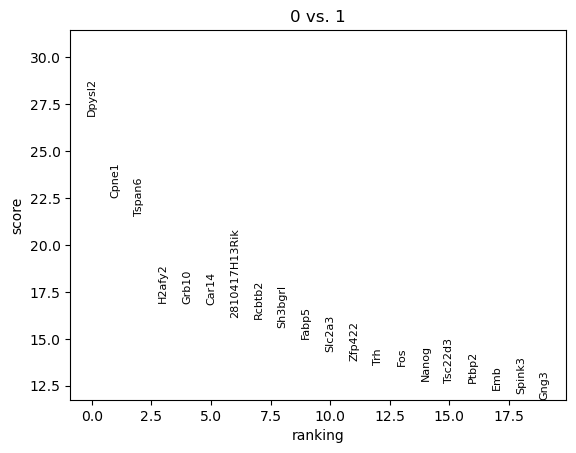

In [37]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='t-test')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


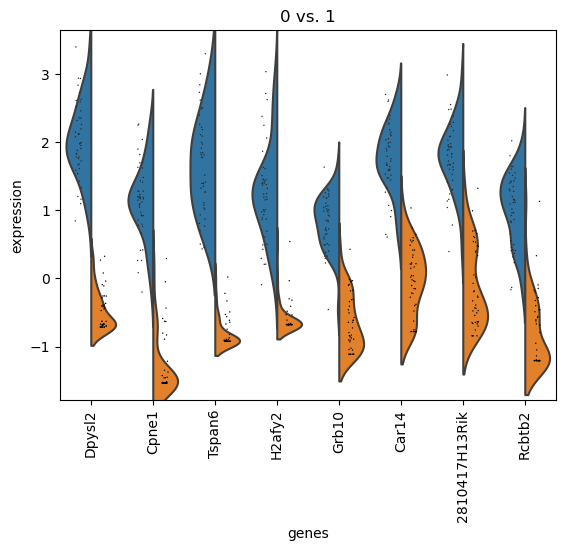

In [38]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/ubuntu/miniconda3/envs/sc_data_integration/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py

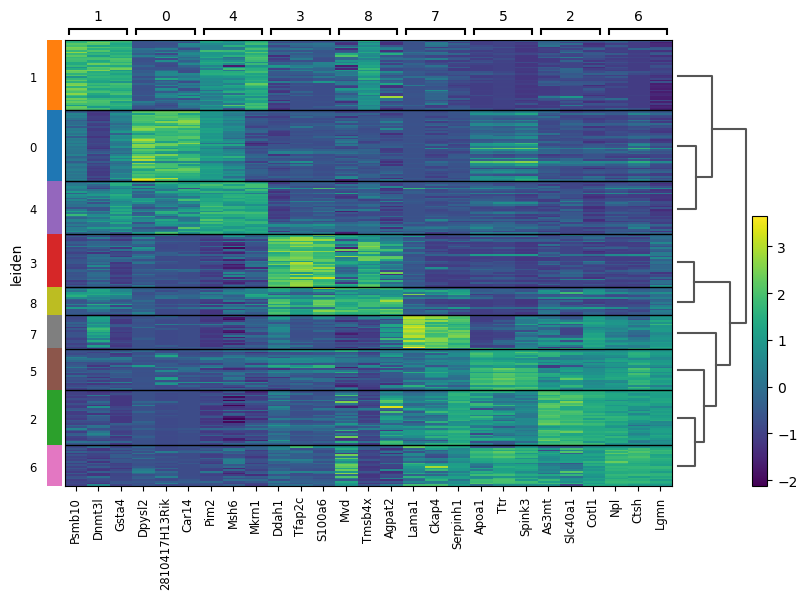

In [39]:
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups_heatmap(adata, n_genes=3, show_gene_labels=True)